In [1]:
#Authentication
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("drive/MyDrive/train.csv")

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


% Male survived: 0.19
% Female survived: 0.74


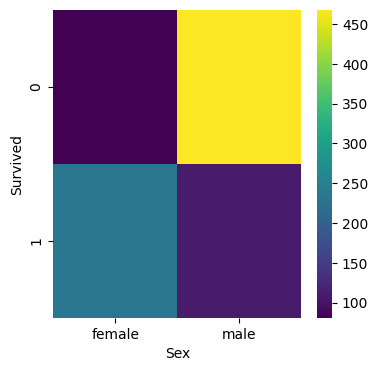

In [6]:
# title Sex vs Survived

women = df.loc[df.Sex == 'female']["Survived"]
rate_women = round(sum(women)/len(women), 2)

men = df.loc[df.Sex == 'male']["Survived"]
rate_men = round(sum(men) / len(men), 2)

print("% Male survived:", rate_men)
print("% Female survived:", rate_women)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(4, 4))
df_2dhist = pd.DataFrame({
    x_label: grp['Survived'].value_counts()
    for x_label, grp in df.groupby('Sex')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Sex')
_ = plt.ylabel('Survived')

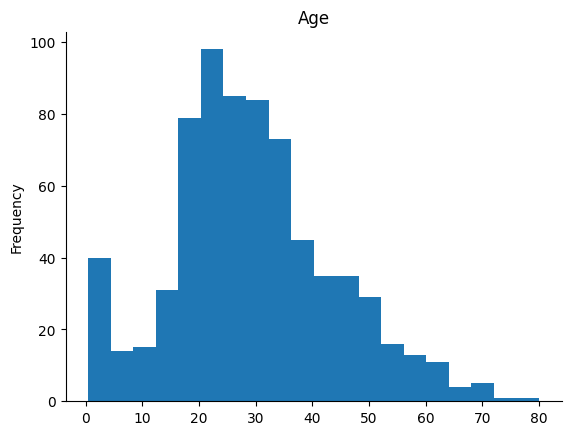

In [7]:
# @title Age

from matplotlib import pyplot as plt
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

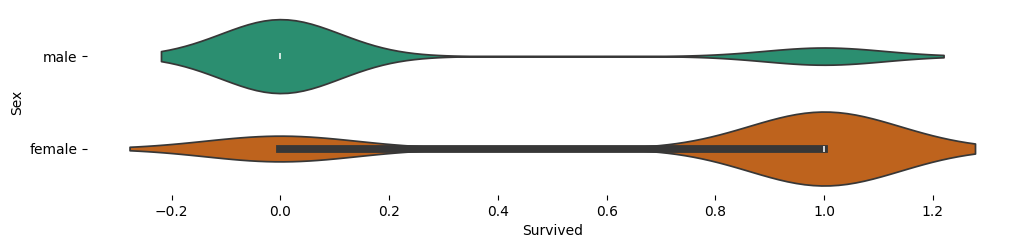

In [8]:
# @title Sex vs Survived

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Survived', y='Sex', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [9]:
# @title Data Preprocessing

class DataPreprocessing(object):

    def __init__(self, df): ##, test_df):
        self.df = df

    def OneHotEncoding(self):
        self.df['Sex'].replace(['male','female'],[0,1],inplace=True)
        self.df['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)

    def DropColumns(self):
        columns_to_exclude = ['Name', 'Ticket', 'Cabin', 'PassengerId']
        self.df.drop(columns = columns_to_exclude, inplace=True)

    def MissingValueHandler(self):
        print(self.df)
        self.df["Age"].fillna(self.df["Age"].mean(), inplace=True)
        self.df["Fare"].fillna(self.df["Fare"].mean(), inplace=True)
        self.df["Embarked"].fillna(0, inplace=True)

    def StdScaler(self):
        scaler = StandardScaler()
        self.df[['Age', 'Fare']] = scaler.fit_transform(self.df[['Age', 'Fare']])

    def Run(self):
        self.OneHotEncoding()
        self.DropColumns()
        self.MissingValueHandler()
        self.StdScaler()
        return self.df

In [10]:
df_preprocessed = DataPreprocessing(df).Run()

     Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0           0       3    0  22.0      1      0   7.2500       0.0
1           1       1    1  38.0      1      0  71.2833       1.0
2           1       3    1  26.0      0      0   7.9250       0.0
3           1       1    1  35.0      1      0  53.1000       0.0
4           0       3    0  35.0      0      0   8.0500       0.0
..        ...     ...  ...   ...    ...    ...      ...       ...
886         0       2    0  27.0      0      0  13.0000       0.0
887         1       1    1  19.0      0      0  30.0000       0.0
888         0       3    1   NaN      1      2  23.4500       0.0
889         1       1    0  26.0      0      0  30.0000       1.0
890         0       3    0  32.0      0      0   7.7500       2.0

[891 rows x 8 columns]


In [11]:
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


In [12]:
# @title Data Modeling

X_train = df_preprocessed.loc[:, df_preprocessed.columns != "Survived"]
y_train = df_preprocessed["Survived"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.3, random_state = 42)

In [14]:
class DataModeling(object):
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test

    def LogisticRegressionModel(self):
        log_reg = LogisticRegression(random_state=42, C=1,solver='liblinear')
        log_reg.fit(self.X_train, self.y_train.values.ravel())
        print("Logistic Regression Accuracy: ", log_reg.score(self.X_test, self.y_test))
        return log_reg

    def RandomForestClassifierModel(self):
        rf_reg = RandomForestClassifier(random_state=42)
        rf_reg.fit(self.X_train, self.y_train)
        print("Random Forest Classifier Accuracy: ", rf_reg.score(self.X_test, self.y_test))
        return rf_reg

    def SVCModel(self):
        svm_clsf = SVC(C= 1,  gamma= 0.1, kernel= 'rbf', class_weight='balanced', coef0=1.0)
        svm_clsf.fit(self.X_train, self.y_train)
        print("SVC Accuracy: ", svm_clsf.score(self.X_test, self.y_test))
        return svm_clsf

    def GaussianNBModel(self):
        Gausmodel=GaussianNB()
        Gausmodel.fit(self.X_train, self.y_train)
        print("GaussianNB Accuracy: ", Gausmodel.score(self.X_test, self.y_test))
        return Gausmodel

    def DecisionTreeClassifier(self):
        DTC_model=DecisionTreeClassifier()
        DTC_model.fit(self.X_train, self.y_train)
        print("Decision Tree Classifier Accuracy: ", DTC_model.score(self.X_test, self.y_test))
        return DTC_model

    def KNeighborsClassifierModel(self):
        knn_clsf = KNeighborsClassifier(n_neighbors=8)
        knn_clsf.fit(self.X_train, self.y_train)
        print("K Neighbors Classifier Accuracy: ", knn_clsf.score(self.X_test, self.y_test))
        return knn_clsf

    def Run(self):
        self.LogisticRegressionModel()
        self.DecisionTreeClassifier()
        self.GaussianNBModel()
        self.SVCModel()
        self.RandomForestClassifierModel()
        self.KNeighborsClassifierModel()

In [15]:
DataModeling(X_train, X_test, y_train, y_test).Run()

Logistic Regression Accuracy:  0.8059701492537313
Decision Tree Classifier Accuracy:  0.753731343283582
GaussianNB Accuracy:  0.7985074626865671
SVC Accuracy:  0.8097014925373134
Random Forest Classifier Accuracy:  0.7985074626865671
K Neighbors Classifier Accuracy:  0.7947761194029851


In [16]:
# @title Data Evaluation

kfold = KFold(n_splits = 10, random_state = 22, shuffle = True) # k=10, split the data into 10 equal parts
cv_mean = []
accuracy = []
std = []

classifiers = ['Logistic Regression','Decision Tree','Naive Bayes','Random Forest', 'SVC', 'KNeighborsClassifier']
models = [LogisticRegression(), DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators=100), SVC(), KNeighborsClassifier()]

for i in models:
    model = i
    cv_result = cross_val_score(model, X_train, y_train, cv = kfold,scoring = "accuracy")
    cv_mean.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)

In [17]:
model_evaluation = pd.DataFrame({'CV Mean': cv_mean, 'Std': std}, index = classifiers)
model_evaluation

,CV Mean,Std
Logistic Regression,0.783436,0.046638
Decision Tree,0.772043,0.039228
Naive Bayes,0.791475,0.050252
Random Forest,0.807424,0.023237
SVC,0.820225,0.032834
KNeighborsClassifier,0.799258,0.033514


In [18]:
# @title Hyperparameter Tuning

print("Finding best hyperparameters....")
model = DataModeling(X_train, X_test, y_train, y_test).SVCModel()

# Define the hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, refit = True, verbose = 3)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_hyperparams = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the model on the validation set
validation_accuracy = best_model.score(X_train, y_train)

# Print the results
print(f"Best Hyperparameters: {best_hyperparams}")
print(f"Validation Accuracy: {validation_accuracy:.4f}")

Finding best hyperparameters....
SVC Accuracy:  0.8097014925373134
Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV 1/5] END ......C=0.001, gamma=1, kernel=rbf;, score=0.624 total time=   0.0s
[CV 2/5] END ......C=0.001, gamma=1, kernel=rbf;, score=0.632 total time=   0.0s
[CV 3/5] END ......C=0.001, gamma=1, kernel=rbf;, score=0.632 total time=   0.1s
[CV 4/5] END ......C=0.001, gamma=1, kernel=rbf;, score=0.371 total time=   0.0s
[CV 5/5] END ......C=0.001, gamma=1, kernel=rbf;, score=0.371 total time=   0.1s
[CV 1/5] END ....C=0.001, gamma=0.1, kernel=rbf;, score=0.624 total time=   0.0s
[CV 2/5] END ....C=0.001, gamma=0.1, kernel=rbf;, score=0.632 total time=   0.0s
[CV 3/5] END ....C=0.001, gamma=0.1, kernel=rbf;, score=0.632 total time=   0.1s
[CV 4/5] END ....C=0.001, gamma=0.1, kernel=rbf;, score=0.371 total time=   0.0s
[CV 5/5] END ....C=0.001, gamma=0.1, kernel=rbf;, score=0.371 total time=   0.0s
[CV 1/5] END ...C=0.001, gamma=0.01, kernel=rbf;, score=0.624

In [19]:
# @title Result

df_test = pd.read_csv("drive/MyDrive/test.csv")

In [20]:
df_test_preprocessed = DataPreprocessing(df_test).Run()

     Pclass  Sex   Age  SibSp  Parch      Fare  Embarked
0         3    0  34.5      0      0    7.8292         2
1         3    1  47.0      1      0    7.0000         0
2         2    0  62.0      0      0    9.6875         2
3         3    0  27.0      0      0    8.6625         0
4         3    1  22.0      1      1   12.2875         0
..      ...  ...   ...    ...    ...       ...       ...
413       3    0   NaN      0      0    8.0500         0
414       1    1  39.0      0      0  108.9000         1
415       3    0  38.5      0      0    7.2500         0
416       3    0   NaN      0      0    8.0500         0
417       3    0   NaN      1      1   22.3583         1

[418 rows x 7 columns]


In [21]:
test_result = pd.Series(best_model.predict(df_test_preprocessed), name = "Survived").astype(int)

In [22]:
df_test_result = pd.read_csv("drive/MyDrive/test.csv")

In [23]:
df_test_result['Survived'] = test_result
df_test_result.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
